In [2]:
path = "MBAR_estimates_all_samples.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(path, sep=';')

In [5]:
df.describe()


,Unnamed: 0,C_p_expect (J/mol/K),N_eff,Vol_expect (mL/mol),dC_p_expect (J/mol/K),dVol_expect (mL/mol),epsilon values,rmin_half values
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,203.500000,83.146496,490.387535,109.467037,7.074141,35.365184,0.109200,1.907294
std,117.923704,15.276675,596.294301,1.193142,3.188992,23.808420,0.003877,0.011046
min,0.000000,27.219900,2.671283,107.358673,2.887301,9.522399,0.102200,1.887000
25%,101.750000,77.533600,66.894290,108.458445,4.443563,17.677659,0.105800,1.898667
50%,203.500000,87.351439,214.682611,109.326523,6.620429,30.989079,0.109400,1.908000
75%,305.250000,90.970589,700.701388,110.524292,9.018188,47.459824,0.112600,1.916000
max,407.000000,123.198486,1996.000000,111.479727,19.296239,174.697240,0.115700,1.926000


In [6]:
eps = np.array(df['epsilon values'])
rmin_half = np.array(df['rmin_half values'])

eps_ = np.array(sorted(list(set(eps))))
rmin_half_ = np.array(sorted(list(set(rmin_half))))

empty_matrix = lambda : np.zeros((len(eps_), len(rmin_half_)))

C_p = empty_matrix()
vol = empty_matrix()

dC_p = empty_matrix()
dvol = empty_matrix()

n_eff = empty_matrix()

eps_dict = {}
for i in range(len(eps_)):
    eps_dict[eps_[i]] = i
rmin_half_dict = {}
for i in range(len(rmin_half_)):
    rmin_half_dict[rmin_half_[i]] = i

for ind in range(len(eps)):
    i = eps_dict[eps[ind]]
    j = rmin_half_dict[rmin_half[ind]]
    
    C_p[i,j] = df['C_p_expect (J/mol/K)'][ind]
    vol[i,j] = df['Vol_expect (mL/mol)'][ind]
    
    dC_p[i,j] = df['dC_p_expect (J/mol/K)'][ind]
    dvol[i,j] = df['dVol_expect (mL/mol)'][ind]
    
    n_eff[i,j] = df['N_eff'][ind]

[    2.67128295   224.15225151   445.63322008   667.11418864   888.5951572
  1110.07612576  1331.55709432  1553.03806288  1774.51903144  1996.        ]


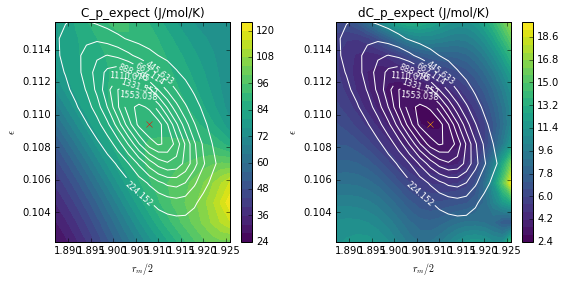

In [21]:
def add_axis_labels_and_colorbar():
    plt.xlabel(r"$r_m / 2$")
    plt.ylabel(r"$\epsilon$")
    plt.colorbar()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('C_p_expect (J/mol/K)')
levels = np.linspace(50,np.max(n_eff),10)
neff1 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff1, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, C_p, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'x',color='red')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dC_p_expect (J/mol/K)')
neff2 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff2, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dC_p, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'x',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("c_p.jpg", dpi=300)

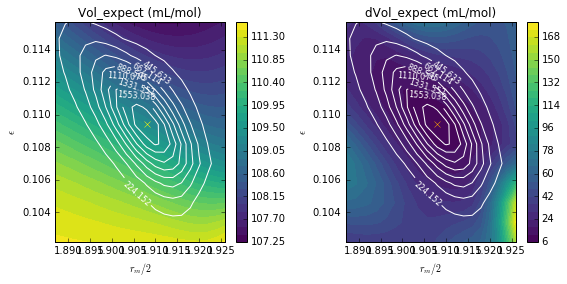

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Vol_expect (mL/mol)')
neff3 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff3, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, vol, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'x',color='yellow')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dVol_expect (mL/mol)')
neff4 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff4, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dvol, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'x',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("vol.jpg", dpi=300)

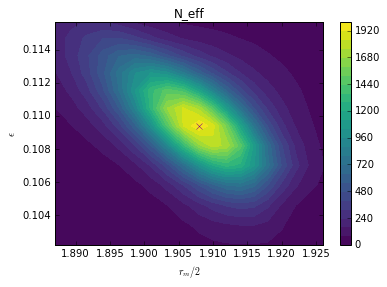

In [67]:
plt.title('N_eff')
plt.contourf(rmin_half_, eps_, n_eff, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'x',color='purple')
add_axis_labels_and_colorbar()
plt.savefig("n_eff.jpg", dpi=300)

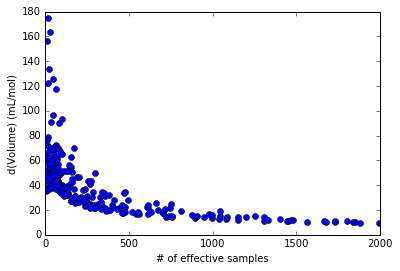

In [53]:
plt.plot(n_eff,dvol,'bo')
plt.xlabel('# of effective samples')
plt.ylabel('d(Volume) (mL/mol)')
plt.show()
plt.savefig('dvol_vs_neff.jpg', dpi=300)

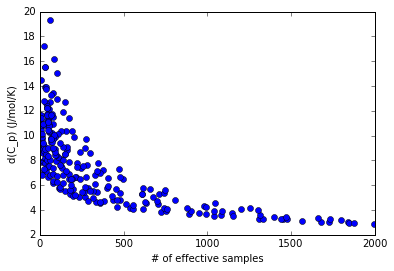

In [54]:
plt.plot(n_eff,dC_p,'bo')
plt.xlabel('# of effective samples')
plt.ylabel('d(C_p) (J/mol/K)')
plt.show()
plt.savefig('dCp_vs_neff.jpg', dpi=300)